Task 3 code
Authors: Chloé Tap, Evan Meltz, Giulia Rivetti
Group 36

[0.28624216 0.9141151  0.90255592 0.68326002 0.90208257 0.89833755
 1.         1.         1.        ]
The figure shows the mse evolution versus an increasing number of iterations:

The following array contains the mean squared value calculations:  [0.4279401475464513, 0.4279401475464513, 0.3343608424861529, 0.3343608424861529, 0.26638278576049645, 0.26638278576049645, 0.2501682537171197, 0.2501682537171197, 0.24811198804973073, 0.24811198804973073, 0.24787607509916698, 0.24787607509916698, 0.2478360219701603, 0.2478360219701603, 0.24781527704344244, 0.24781527704344244, 0.2477959025948902, 0.2477959025948902, 0.2477763596472891, 0.2477763596472891, 0.24775661399905877, 0.24775661399905877, 0.24773670489235733, 0.24773670489235733, 0.24771664991973885, 0.24771664991973885, 0.2476964545219135, 0.2476964545219135, 0.24767611956926633, 0.24767611956926633, 0.24765564435355458, 0.24765564435355458, 0.24763502763098375, 0.24763502763098375, 0.24761426797332253, 0.24761426797332253, 0.2475933

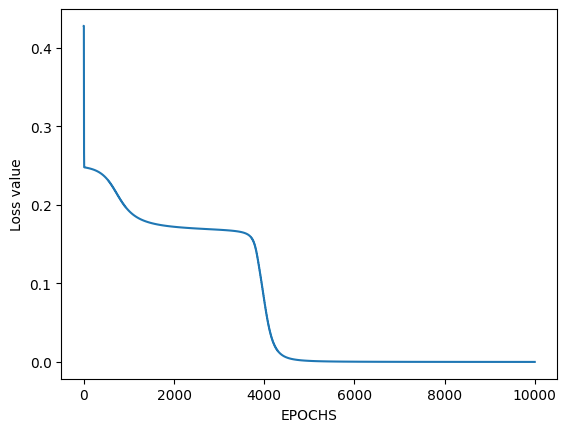

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from numpy import mean
from numpy.random import rand
from numpy.random import randn

x = np.array([[0,0,1,1],[0,1,0,1]]) # Training data
y = np.array([[0,1,1,0]]) # Labels of training data

lr = 0.5 # learning rate
n_training = x.shape[1] # number of training examples = 4

dw_in = 0 # Initialize gradients
dw_out = 0
db_in = 0
db_out = 0

wrong_counter = 0 # To count number of miss-classified inputs
right_counter = 0

# Sigmoid activation function for hidden and output nodes
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

#Tanh activation function
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

#Relu activation function
def relu(x):
    return(np.maximum(0, x))

# Divide weights vector to separate ingoing and outgoing weights and biases
def reshaping(weights):
  w_in = weights[0:4]
  w_in = w_in.reshape(2, 2)
  w_out = weights[4:6]
  w_out = w_out.reshape(1, 2)
  bias_in = weights[6:8]
  bias_in = bias_in.reshape(2, 1)
  bias_out = weights[8]

  return w_in, w_out, bias_in, bias_out


# Forward propagation
def forward_prop(weights, x):
    w_in, w_out, bias_in, bias_out = reshaping(weights)
    z_in = np.dot(w_in, x) + bias_in
    a_in = sigmoid(z_in)
    #a_in = tanh(z_in)
    #a_in = relu(z_in)
    z_out = np.dot(w_out, a_in) + bias_out
    a_out = sigmoid(z_out)
    #a_out = tanh(z_out)
    #a_out = relu(z_out)
    return z_in, a_in, z_out, a_out


def xor_net(inputs, weights):
    w_in, w_out, bias_in, bias_out = reshaping(weights)

    z_in, a_in, z_out, a_out = forward_prop(weights, test)
    a_out = np.squeeze(a_out)
    if a_out >= 0.5:
        print("For input", [i[0] for i in inputs], "output is 1")
    else:
        print("For input", [i[0] for i in inputs], "output is 0")


def mse(weights):
  global right_counter
  global wrong_counter
  z_in, a_in , z_out, a_out = forward_prop(weights, x)
  loss = (1 / y.size) * np.sum((y-a_out)**2)
  losses.append(loss)
  for elem in a_out:
    index = 0
    for digit in elem:
      if digit >= 0.5:
        if y[0][index] == 1:
          right_counter += 1
        else:
          wrong_counter += 1
      else:
        if y[0][index] == 0:
          right_counter += 1
        else:
          wrong_counter += 1
      index += 1
  return loss


def grdmse(weights):
  w_in, w_out, bias_in, bias_out = reshaping(weights)

  dz_out = a_out - y
  dw_out = np.dot(dz_out, a_in.T) / n_training
  dz_in = np.dot(w_out.T, dz_out) * a_in*(1 - a_in)

  dw_in = np.dot(dz_in, x.T) / n_training
  dw_in = np.reshape(dw_in, w_in.shape)
  dw_out = np.reshape(dw_out, w_out.shape)
  dB_out = np.sum(dz_out, axis = 1, keepdims = True)
  dB_in = np.sum(dz_in, axis = 1, keepdims = True) / n_training

  result = np.concatenate((dw_in, dw_out), axis=None)
  result = np.concatenate((result, dB_in), axis=None)
  result = np.concatenate((result, dB_out), axis=None)
  return result


n_inputs = 2 # number of inputs
n_outputs = 1 # number of outputs
n_hidden = 2 # number of hidden nodes

def xavier_initialization():
  n = 2   # number of nodes in the previous layer
  lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n)) # calculate the range for the weights
  numbers = rand(6)
  scaled = lower + numbers * (upper - lower) # scale to desired range
  return scaled


def he_initialization():
  n = 2
  std = sqrt(2.0 / n) # calculate the range for the weights
  numbers = randn(6)
  scaled = numbers * std   # scale to the desired range
  return scaled

# Weight initialization
#np.random.seed(1)
init = 1 # to deicide which initialization stratey to use
# 1. Random
if init == 1:
  weights = np.random.rand(n_hidden*n_inputs + n_outputs*n_hidden)

# 2. Standard Gaussian initialization
if init == 2:
  i = 0
  weights = []
  while i < (n_hidden*n_outputs + n_hidden*n_inputs):
    weights.append(np.random.normal(loc=0.0, scale=1.0) * 0.01)
    i += 1

# 3. Uniform initialization
if init == 3:
  i = 0
  weights = []
  while i < (n_hidden*n_outputs + n_hidden*n_inputs):
    weights.append(np.random.uniform(low=-0.05, high=0.05))
    i += 1

# 4. Xavier initialization
if init == 4:
  weights = xavier_initialization()

# 5. He initialization
if init == 5:
  weights = he_initialization()

weights = np.append(weights, [1.0, 1.0, 1.0]) # Append biases
print(weights)

losses = []
right_counter = 0
wrong_counter = 0


# Gradient descent
iterations = 5000
for i in range(iterations):
    z_in, a_in, z_out, a_out = forward_prop(weights, x)
    loss = mse(weights)
    losses.append(loss)
    weights = weights - lr * grdmse(weights)

# We plot losses to see how our network is doing
print("The figure shows the mse evolution versus an increasing number of iterations:")
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
print("\nThe following array contains the mean squared value calculations: ", losses)
print("Number of missclassified inputs: " , wrong_counter, " out of ", wrong_counter + right_counter
      , "(", (wrong_counter / (wrong_counter + right_counter)) * 100, "%)\n")
# We can notice that for each new calculation of the loss (mse) it decreases, meaning that
# each time the distance between the actual and the predicted values decreases, which was expected.


# Call function xor_net
test = np.array([[1],[0]])
xor_net(test, weights)
test = np.array([[0],[0]])
xor_net(test, weights)
test = np.array([[0],[1]])
xor_net(test, weights)
test = np.array([[1],[1]])
xor_net(test, weights)


# Accuracy = number of correct predictions / tot number of predictions
accuracy = right_counter / (right_counter + wrong_counter)
print("\nAccuracy = ", accuracy * 100, "%")



Accuracy obtined using different values of learning rate and emplying several initialization techniques for the weights.

**Learning rate = 0.5**

1. Random

Weights array:
[0.58330349 0.56823626 0.68842933 0.49400875 0.99043827 0.0486503 1 1 1]. Accuracy = 95.98, XOR computed.

Weights array:
[0.50316032 0.95628624 0.73659913 0.24134197 0.67901096 0.67742588 1 1 1]. Accuracy = 94.62%, XOR computed.

Weights array:
[0.18128428 0.07278068 0.29949262 0.54714837 0.84001295 0.83801672 1 1 1]. Accuracy = 93.79%, XOR computed.

Weights array:
[0.20672783 0.07125661 0.37863959 0.685927   0.71957172 0.58707025 1 1 1]. Accuracy = 94.66%, XOR computed.

Weights array:
[0.59717344 0.67568764 0.08119965 0.6094196  0.11234127 0.81069179 1 1 1]. Accuracy = 92.40%, XOR computed.

2. Standard Gaussian

Weights array:
[ 0.01010121  0.01903569  0.00798274 -0.01362236 -0.00461768 -0.01194064 1 1 1]. Accuracy = 67.22%, XOR computed.

Weights array:
[ 0.00398342  0.01118307 -0.00165034  0.01717505 -0.00142578 -0.0033024 1 1 1]. Accuracy = 62.76%, XOR computed.

Weights array:
[ 4.43270795e-03 -9.83015923e-03 -7.11363007e-03  7.20966988e-04 3.78020884e-03 -1.36509756e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 65.61%, XOR computed.

Weights array:
[ 1.46445948e-03  2.12270156e-03 -8.16357529e-04 -6.68291510e-03 1.25165003e-02 -8.34662663e-03  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 66.59%, XOR not computed correctly.

Weights array:
[ 0.01709923  0.00765742  0.00513914 -0.00244735 -0.01679455 -0.00530196 1 1 1]. Accuracy = 60.61%, XOR not computed correctly.

3. Uniform

Weights array:
[ 0.02569571  0.02081759  0.04429979  0.00341436 -0.0418794   0.04806233 1 1 1]. Accuracy = 60.35%, XOR computed.

Weights array:
[ 0.03692547  0.03023185 -0.00398294 -0.01462099  0.00538786 -0.02880721 1 1 1]. Accuracy = 59.98%, XOR not computed correctly.

Weights array:
[ 0.00187353 -0.00853469 -0.04465639  0.03501612 -0.01787063  0.01161925 1 1 1]. Accuracy = 78.80%, XOR computed.

Weights array:
[-7.91683210e-04 -1.36222596e-02  1.24059305e-02  4.45985637e-02 1.57468754e-02  2.73885017e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 64.99%, XOR computed.

Weights array:
[-0.02012229 -0.0173067   0.04293533  0.01819935 -0.02453756 -0.03987724 1 1 1]. Accuracy = 69.85%, XOR computed.

4. Xavier

Weights array:
[-0.07299326  0.0449452  -0.56704029  0.53844867 -0.23545077  0.47161146 1 1 1]. Accuracy = 92.42%, XOR computed.

Weights array:
[-0.56273762  0.65455236 -0.51911387  0.33546556 -0.49178676 -0.59849648 1 1 1]. Accuracy = 95.66%, XOR comoputed.

Weights array:
[-0.15705025  0.47378319  0.31277606  0.53599002  0.39014132  0.47111074 1 1 1]. Accuracy = 92.25%, XOR computed.

Weights array:
[-0.48382872 -0.05256656 -0.16855427 -0.47298929 -0.16855464  0.01710938 1 1 1]. Accuracy = 90.68%, XOR computed.

Weights array:
[ 0.40569192 -0.45621098  0.38393634 -0.20057102  0.42382389 -0.30535061 1 1 1]. Accuracy = 94.35%, XOR computed.

5. He

Weights array:
[ 0.57858105  1.27219515  0.92550278 -0.69777639  1.00351561  0.14569531 1 1 1]. Accuracy = 50.00%, XOR not computed correctly.

Weights array:
[-1.1258719  -1.76139389 -1.20046215  2.01863495 -1.08449089  0.2263925 1 1 1]. Accuracy = 50.20%, XOR not computed correctly.

Weights array:
[-0.96422881 -1.76217214  0.88755301 -1.88637491 -0.80848326 -1.48582394 1 1 1]. Accuracy = 50.00%, XOR not computed correctly.

Weights array:
[-0.12508112 -2.03455288 -1.09436126  1.25988184  0.59035645  0.65326087 1 1 1]. Accuracy = 96.03%, XOR computed.

Weights array:
[-0.41977534  1.06680537  0.38617344  1.35253683 -1.06099631 -0.75730225 1 1 1]. Accuracy = 96.16%, XOR computed.

**Learning rate = 0.1**

1. Random

Weights array:
[0.53040802 0.18327197 0.0532543  0.49121105 0.35911497 0.56642082 1 1 1]. Accuracy = 69.71%, XOR not computed correctly.

Weights array:
[0.5916842  0.33148792 0.677559   0.71088517 0.53694836 0.31523993 1 1 1]. Accuracy = 74.85%, XOR not computed correctly.

Weights array:
[0.30995315 0.05803778 0.81587892 0.9569988  0.85760125 0.64287784 1 1 1]. Accuracy = 76.78%, XOR computed.

Weights array:
[0.01900315 0.82061025 0.45875701 0.49987609 0.14852406 0.95963481 1 1 1]. Accuracy = 70.75%, XOR not computed correctly.

Weights array:
[0.77055341 0.40412558 0.09853864 0.28114726 0.80175999 0.76045347 1 1 1]. Accuracy = 75.93%, XOR computed.

2. Standard Gaussian

Weights array:
[-0.0066484  -0.00475064  0.00180631 -0.00204984  0.00524828 -0.01204562 1 1 1]. Accuracy = 50.03%, XOR not computed correctly.

Weights array:
[ 3.23462369e-05  8.67691580e-03 -9.56761085e-03 -1.07647208e-02 6.30815161e-03  6.53194966e-03  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 49.99%, XOR not computed correctly.

Weights array:
[-0.01392243 -0.00644735  0.0120846   0.00358126  0.00277278  0.0171033 1 1 1]. Accuracy = 50.75%, XOR not computed correctly.

Weights array:
[-0.01178129  0.01259116 -0.00180098  0.00102583  0.00310146  0.0144909 1 1 1]. Accuracy = 49.94%, XOR not computed correctly.

Weights array:
[-0.00978444  0.00560224 -0.0167892  -0.00259714 -0.00900477 -0.00296188 1 1 1]. Accuracy = 49.98%, XOR not computed correctly.

3. Uniform

Weights array:
[ 0.04284617  0.00837911  0.01179675 -0.02777591 -0.02886003  0.03398953 1 1 1]. Accuracy = 49.99%, XOR not computed correctly.

Weights array:
[-2.56050824e-03 -6.90871293e-04 -1.21144014e-02 -1.40862390e-02 2.20231758e-02  3.49332382e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 50.21%, XOR not computed correctly.

Weights array:
[ 0.04597572 -0.02817311  0.03622062  0.02772062  0.00912766  0.03417122 1 1 1]. Accuracy = 50.00%, XOR not computed correctly.

Weights array:
[0.01803423 0.01392724 0.02719524 0.04032741 0.01220932 0.03953501 1 1 1]. Accuracy = 50.10%, XOR not computed correctly.

Weights array:
[ 0.00296102 -0.02131859 -0.00735547 -0.03321904 -0.01476552 -0.02732503 1 1 1]. Accuracy = 50.0%, XOR not computed correctly.

4. Xavier

Weights array:
[ 0.1432461   0.6499963   0.6664057  -0.66109175  0.28817998  0.39425748 1 1 1]. Accuracy = 60.38%, XOR not computed correctly.

Weights array:
[-0.03057186  0.36377439  0.341516    0.39925901 -0.36184754 -0.51198029 1 1 1]. Accuracy = 61.70%, XOR not computed correctly.

Weights array:
[ 0.20378487  0.01325864 -0.20258972  0.59484819  0.19780794 -0.05727584 1 1 1]. Accuracy = 66.56%, XOR not computed correctly.

Weights array:
[-0.24896658 -0.66307164 -0.52473948 -0.63204878  0.07771974 -0.06552119 1 1 1]. Accuracy = 51.62%, XOR not computed correctly.

Weights array:
[-0.21550079  0.34522564 -0.43569987  0.20342437 -0.33390845  0.66883673 1 1 1 1]. Accuracy = 68.93%, XOR computed.

5. He

Weights array:
[-0.11624624  0.28671387 -2.01925068  0.24450046  0.7581932   0.37534782 1 1 1]. Accuracy = 52.82%, XOR not computed correctly.

Weights array:
[ 0.29189358 -1.03483309 -0.7377613  -0.42799326  0.02644093  0.42619359 1 1 1]. Accuracy = 65.97%, XOR computed.

Weights array:
[ 0.94635415  0.91714363  0.70871907 -1.61374749  0.265432    1.71133242 1 1 1]. Accuracy = 56.81%, XOR not computed correctly.

Weights array:
[-0.60764896  0.28458975  0.682269    0.88131346  0.30491039 -0.51068997 1 1 1]. Accuracy = 48.88%, XOR not computed correctly.

Weights array:
[-0.86413103  1.93916406 -0.20786299 -1.2180004   0.73314142  1.62026202 1 1 1]. Accuracy = 71.02%, XOR computed.

**Learning rate = 0.9**

1. Random

Weights array:
[0.98783769 0.39503664 0.46241862 0.19065772 0.46839257 0.58750697 1 1 1]. Accuracy = 96.69%, XOR computed.

Weights array:
[0.5859309  0.4063252  0.73388554 0.85089785 0.12134928 0.50491494 1 1 1]. Accuracy = 97.70%, XOR computed.

Weights array:
[0.87715269 0.49355372 0.20925945 0.31108116 0.26796224 0.38988314 1 1 1]. Accuracy = 97.23%, XOR computed.

Weights array:
[0.22957463 0.5271855  0.7643763  0.21486258 0.21095472 0.80359445 1 1 1]. Accuracy = 96.99%, XOR computed.

Weights array:
[0.02913477 0.35513826 0.24171153 0.05377627 0.75135568 0.70369265 1 1 1]. Accuracy = 95.33%, XOR computed.

2. Standard Gaussian

Weights array:
[-3.08995819e-03  1.84396373e-02  5.42229053e-04 -3.70655178e-03 4.22143419e-03  1.22218312e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 80.43%, XOR computed.

Weights array:
[ 3.19064933e-04 -8.60410660e-03  1.19044763e-02 -1.45884375e-02 1.93181425e-02 -2.23392809e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 84.07%, XOR computed.

Weights array:
[ 0.01297182  0.0029512  -0.01681547  0.00561108 -0.0126774   0.01531838 1 1 1]. Accuracy = 83.19%, XOR computed.

Weights array:
[ 0.01693403 -0.00591677 -0.01278265 -0.00850108  0.00624452 -0.00680832 1 1 1]. Accuracy = 81.80%, XOR computed.

Weights array:
[ 0.00680757  0.00709284 -0.00257699 -0.00889945  0.0138406   0.00396361 1 1 1]. Accuracy = 75.47%, XOR computed.

3. Uniform

Weights array:
[-0.04244619  0.01258341  0.02969419  0.00836667 -0.00457964  0.01392568 1 1 1]. Accuracy = 87.99%, XOR computed.

Weights array:
[ 3.25630341e-02 -8.33010359e-04  3.52531087e-02  2.12781487e-02 2.38014311e-02  4.35876952e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 79.86%, XOR computed.

Weights array:
[ 4.30515949e-02 -4.96831392e-02  4.62690280e-02 -1.63243909e-02 1.76776533e-04 -1.85818776e-02  1.00000000e+00  1.00000000e+00 1.00000000e+00]. Accuracy = 88.65%, XOR computed.

Weights array:
[-0.02643203  0.02894793  0.00184762  0.04890735 -0.03081261 -0.03309113 1 1 1]. Accuracy = 86.20%, XOR computed.

Weights array:
[-0.02650172  0.01428709  0.01289589  0.02503346  0.03932919  0.03288884 1 1 1]. Accuracy = 81.53%, XOR computed.

4. Xavier

Weights array:
[-0.08518358  0.51076457  0.28670494  0.27813029  0.41556548  0.65664606 1 1 1]. Accuracy = 96.14%, XOR computed

Weights array:
[-0.07003312 -0.1755904   0.33541753  0.43416093  0.17807052 -0.48677713 1 1 1]. Accuracy = 93.15%, XOR computed.

Weights array:
[ 0.33176081 -0.19845562  0.37840862  0.07314793  0.4390104  -0.23370108 1 1 1]. Accuracy = 95.37%, XOR computed

Weights array:
[ 0.09947507  0.21931073  0.49580175 -0.64857985 -0.02308488  0.58527065 1 1 1]. Accuracy = 93.45%, XOR computed.

Weights array:
[-0.18327195  0.30820439 -0.12212357 -0.44577828 -0.68205668 -0.18530169 1 1 1]. Accuracy = 97.63%, XOR computed.

5. He

Weights array:
[ 0.42767018 -0.52425446  2.10687911 -2.57429815  0.10430723  1.08565314 1 1 1]. Accuracy = 98.56%, XOR computed.

Weights array:
[-0.08712331  1.56092722  0.16551832  0.01568118  0.58520473  1.38385978 1 1 1]. Accuracy = 96.54%, XOR computed.

Weights array:
[-0.42921316  0.73569498 -0.38539454 -0.74392216 -0.53998349  0.70991376 1 1 1]. Accuracy = 97.35%, XOR computed.

Weights array:
[ 1.21351324  1.86598448 -0.1067798   0.69430912 -1.07251296  1.7328238 1 1 1]. Accuracy = 52.16%, XOR not computed correctly.

Weights array:
[-0.14302578  1.05035745 -0.93895799  0.61423919  0.73490736  0.57604248 1 1 1]. Accuracy = 50.11%, XOR not computed correctly.